In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from matplotlib import font_manager, rc 
import matplotlib
# '-' 부호가 제대로 표시되게 하는 설정 
matplotlib.rcParams['axes.unicode_minus'] = False
# 운영 체제마다 한글이 보이게 하는 설정 # 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name() 
    rc('font', family=font_name)
#맥
elif platform.system() == 'Darwin': 
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [2]:
import openpyxl
import xlwt
import xlrd

In [5]:
power_data = pd.read_excel("data/시도별_용도별.xls")
power_data

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
5,광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,...,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649
6,대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,...,516493,58446,180189,252662,1381273,68127,41814,33616,5937633,15386372
7,대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,...,77970,2949,83609,474561,218191,5439,31657,2252,2640312,9423804
8,부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,...,904149,4913,107717,90644,1046529,231141,49733,13104,7645804,21007358
9,서울,13131172,3581534,27647345,31228879,15150,4064,1918893,227077,497699,...,163688,4395,11425,46225,20182,17656,132707,2875,1938107,46298158


In [6]:
power_data.columns

Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
       '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
       '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계', '합계'],
      dtype='object')

In [7]:
power = power_data.set_index("구분")
power

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
개성,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,6782,...,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649
대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,16215,...,516493,58446,180189,252662,1381273,68127,41814,33616,5937633,15386372
대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,4311,...,77970,2949,83609,474561,218191,5439,31657,2252,2640312,9423804
부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,51980,...,904149,4913,107717,90644,1046529,231141,49733,13104,7645804,21007358


In [8]:
power = power.drop(["개성", "합계"], errors = "ignore")
power

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,6782,...,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649
대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,16215,...,516493,58446,180189,252662,1381273,68127,41814,33616,5937633,15386372
대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,4311,...,77970,2949,83609,474561,218191,5439,31657,2252,2640312,9423804
부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,51980,...,904149,4913,107717,90644,1046529,231141,49733,13104,7645804,21007358
서울,13131172,3581534,27647345,31228879,15150,4064,1918893,227077,497699,4399,...,163688,4395,11425,46225,20182,17656,132707,2875,1938107,46298158


In [9]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 강원 to 충북
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   주거용     17 non-null     int64
 1   공공용     17 non-null     int64
 2   서비스업    17 non-null     int64
 3   업무용합계   17 non-null     int64
 4   농림어업    17 non-null     int64
 5   광업      17 non-null     int64
 6   제조업     17 non-null     int64
 7   식료품제조   17 non-null     int64
 8   섬유,의류   17 non-null     int64
 9   목재,나무   17 non-null     int64
 10  펄프,종이   17 non-null     int64
 11  출판,인쇄   17 non-null     int64
 12  석유,화확   17 non-null     int64
 13  의료,광학   17 non-null     int64
 14  요업      17 non-null     int64
 15  1차금속    17 non-null     int64
 16  조립금속    17 non-null     int64
 17  기타기계    17 non-null     int64
 18  사무기기    17 non-null     int64
 19  전기기기    17 non-null     int64
 20  영상,음향   17 non-null     int64
 21  자동차     17 non-null     int64
 22  기타운송    17 non-null     int64
 23  가구및기타   17 non-null  

In [10]:
power = power.drop("합계", axis = 1)
power

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,...,39477,35063,2019,38062,43986,113448,108629,12872,3418,7007712
경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,...,2302355,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937
경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,...,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580
경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,...,933178,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631
광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,6782,...,156396,198847,5967,236622,723764,512148,5140,13392,16049,2988274
대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,16215,...,661307,516493,58446,180189,252662,1381273,68127,41814,33616,5937633
대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,4311,...,69342,77970,2949,83609,474561,218191,5439,31657,2252,2640312
부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,51980,...,872952,904149,4913,107717,90644,1046529,231141,49733,13104,7645804
서울,13131172,3581534,27647345,31228879,15150,4064,1918893,227077,497699,4399,...,64682,163688,4395,11425,46225,20182,17656,132707,2875,1938107


<Axes: xlabel='구분'>

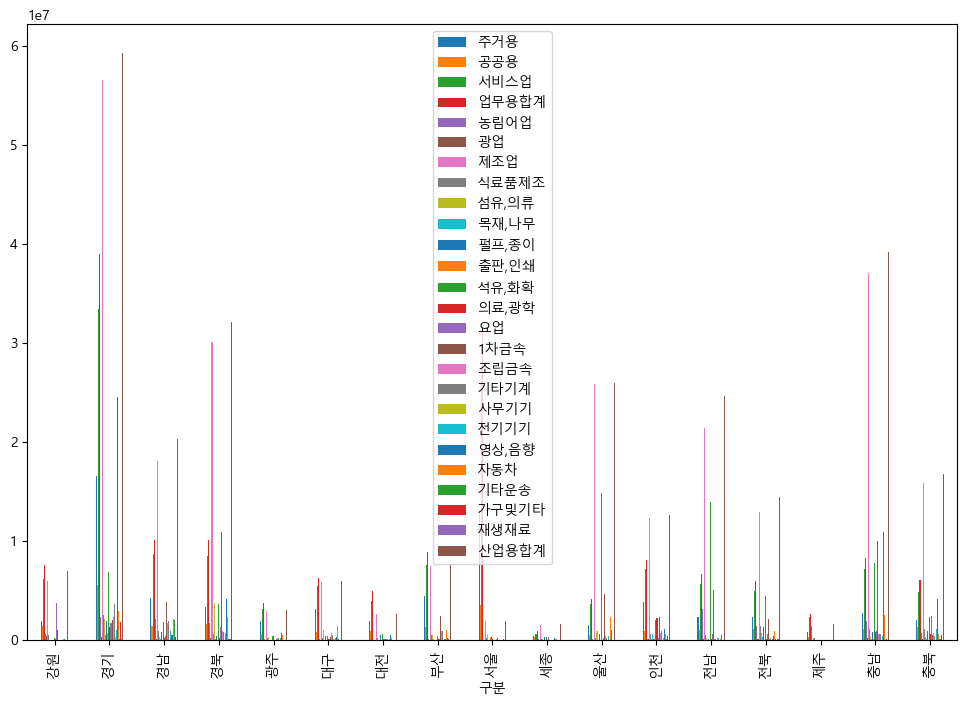

In [11]:
power.plot(kind = "bar", figsize = (12,8))

<Axes: xlabel='구분'>

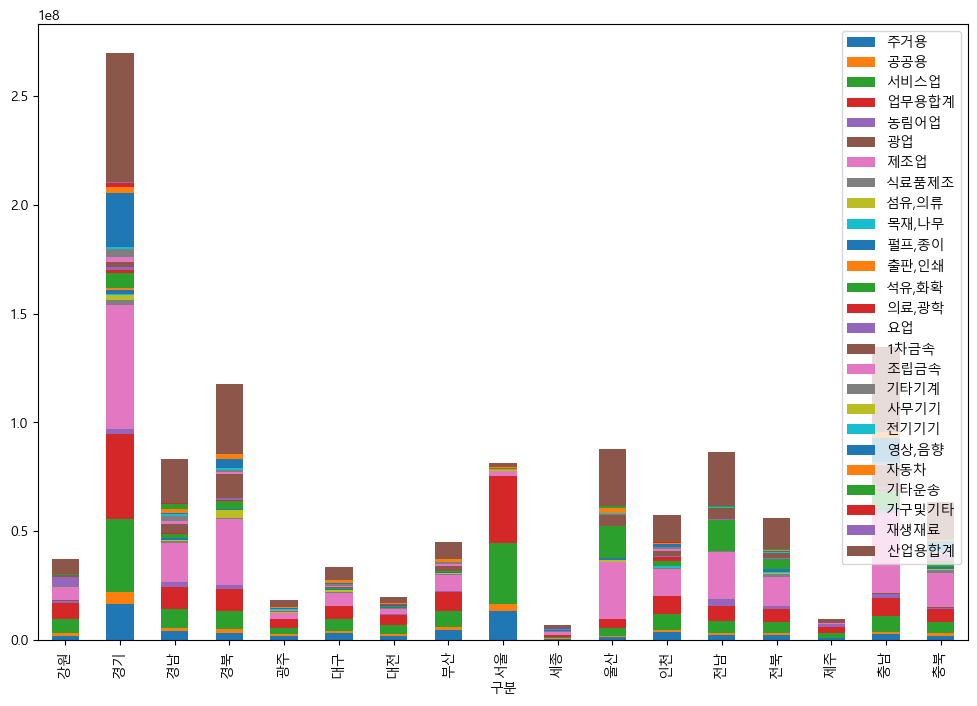

In [12]:
power.plot(kind = "bar", figsize = (12,8), stacked = True)

<Axes: ylabel='구분'>

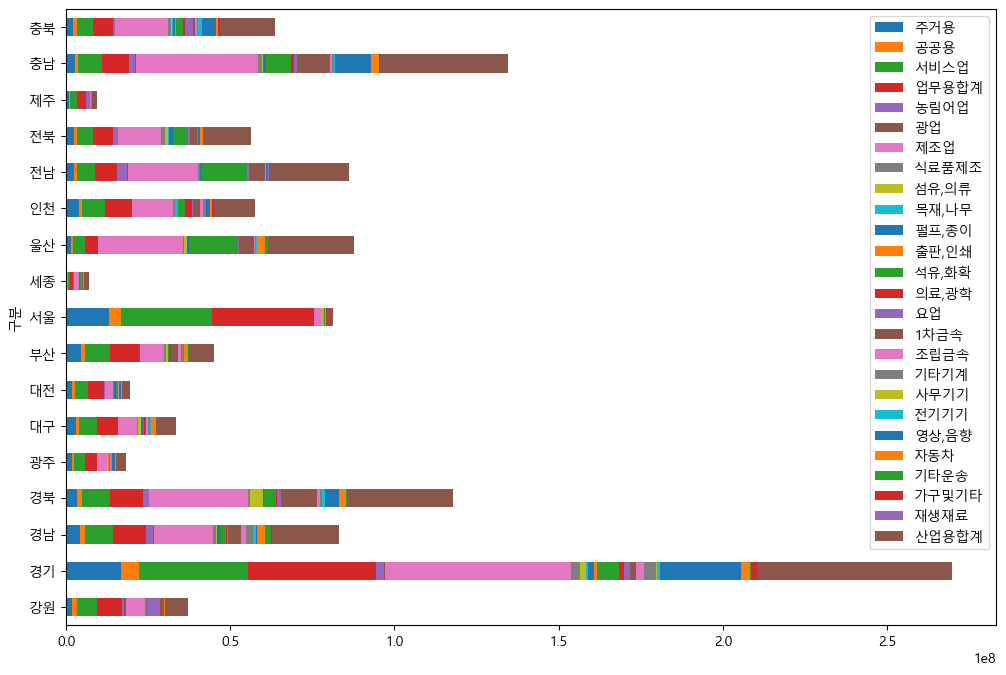

In [13]:
power.plot(kind = "barh", figsize = (12,8), stacked = True)

In [14]:
power_data.columns

Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
       '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
       '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계', '합계'],
      dtype='object')

<Axes: ylabel='구분'>

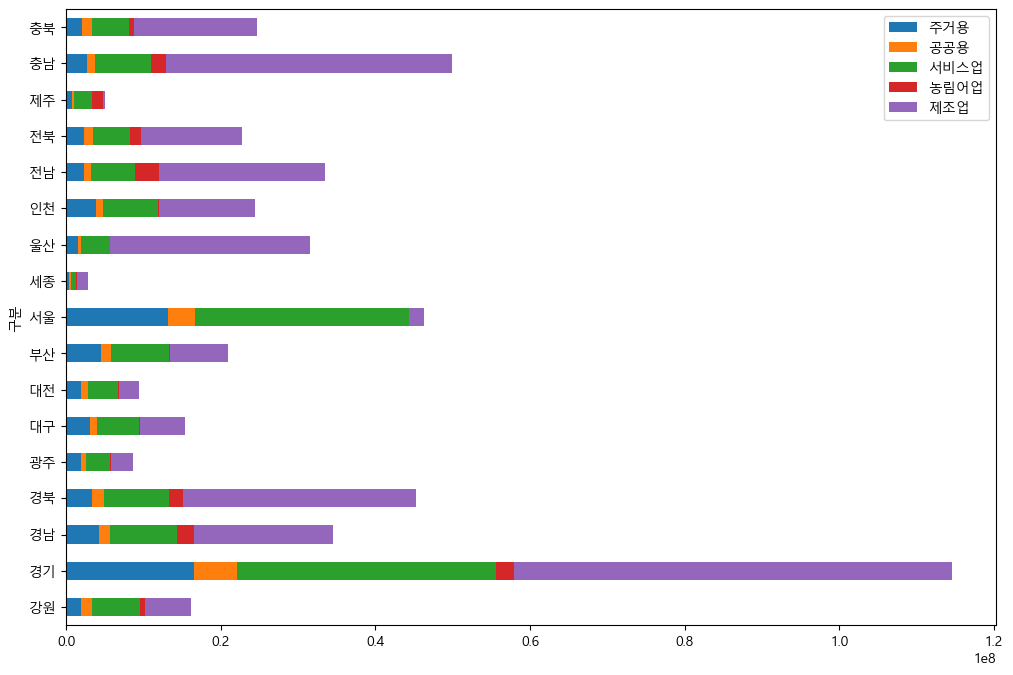

In [15]:
sample = ["주거용","공공용","서비스업","농림어업","제조업"]
power[sample].plot(kind = "barh", figsize = (12,8), stacked = True)

<Axes: ylabel='구분'>

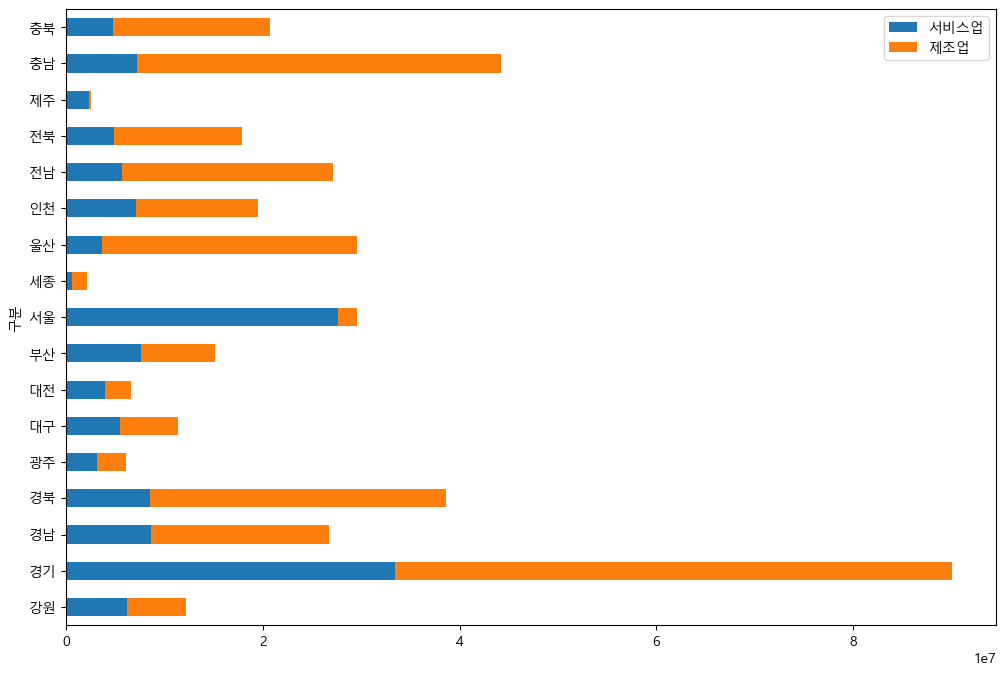

In [16]:
sample = ["서비스업","제조업"]
power[sample].plot(kind = "barh", figsize = (12,8), stacked = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '강원'),
  Text(1, 0, '경기'),
  Text(2, 0, '경남'),
  Text(3, 0, '경북'),
  Text(4, 0, '광주'),
  Text(5, 0, '대구'),
  Text(6, 0, '대전'),
  Text(7, 0, '부산'),
  Text(8, 0, '서울'),
  Text(9, 0, '세종'),
  Text(10, 0, '울산'),
  Text(11, 0, '인천'),
  Text(12, 0, '전남'),
  Text(13, 0, '전북'),
  Text(14, 0, '제주'),
  Text(15, 0, '충남'),
  Text(16, 0, '충북')])

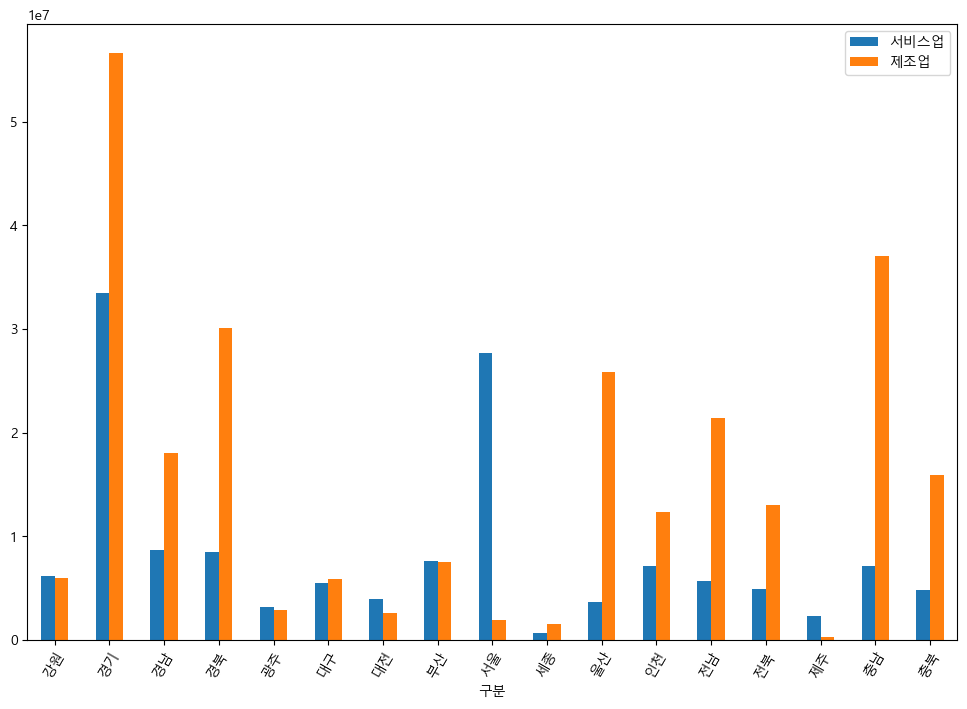

In [18]:
sample = ["서비스업","제조업"]
power[sample].plot(kind = "bar", figsize = (12,8), stacked = False)
plt.xticks(rotation = 60)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(-2.0, 0, '충남'),
  Text(0.0, 0, '강원'),
  Text(2.0, 0, '경남'),
  Text(4.0, 0, '광주'),
  Text(6.0, 0, '대전'),
  Text(8.0, 0, '서울'),
  Text(10.0, 0, '울산'),
  Text(12.0, 0, '전남'),
  Text(14.0, 0, '제주'),
  Text(16.0, 0, '충북'),
  Text(18.0, 0, '')])

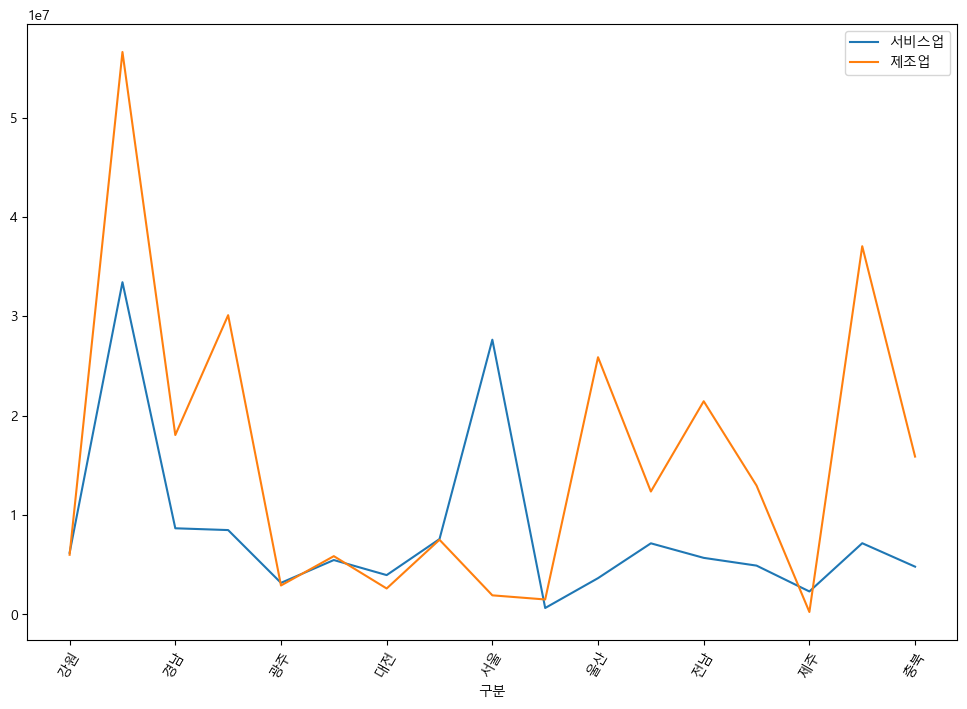

In [19]:
sample = ["서비스업","제조업"]
power[sample].plot(kind = "line", figsize = (12,8), stacked = False)
plt.xticks(rotation = 60)
#line 그래프는 부적절

### 스캐터 플롯
### 두개의 변수 관계를 점으로 표시

In [20]:
see2 = ["서비스업", "제조업"]
power2 = power[see2]
power2

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633
대전,3955921,2608343
부산,7582169,7512588
서울,27647345,1918893


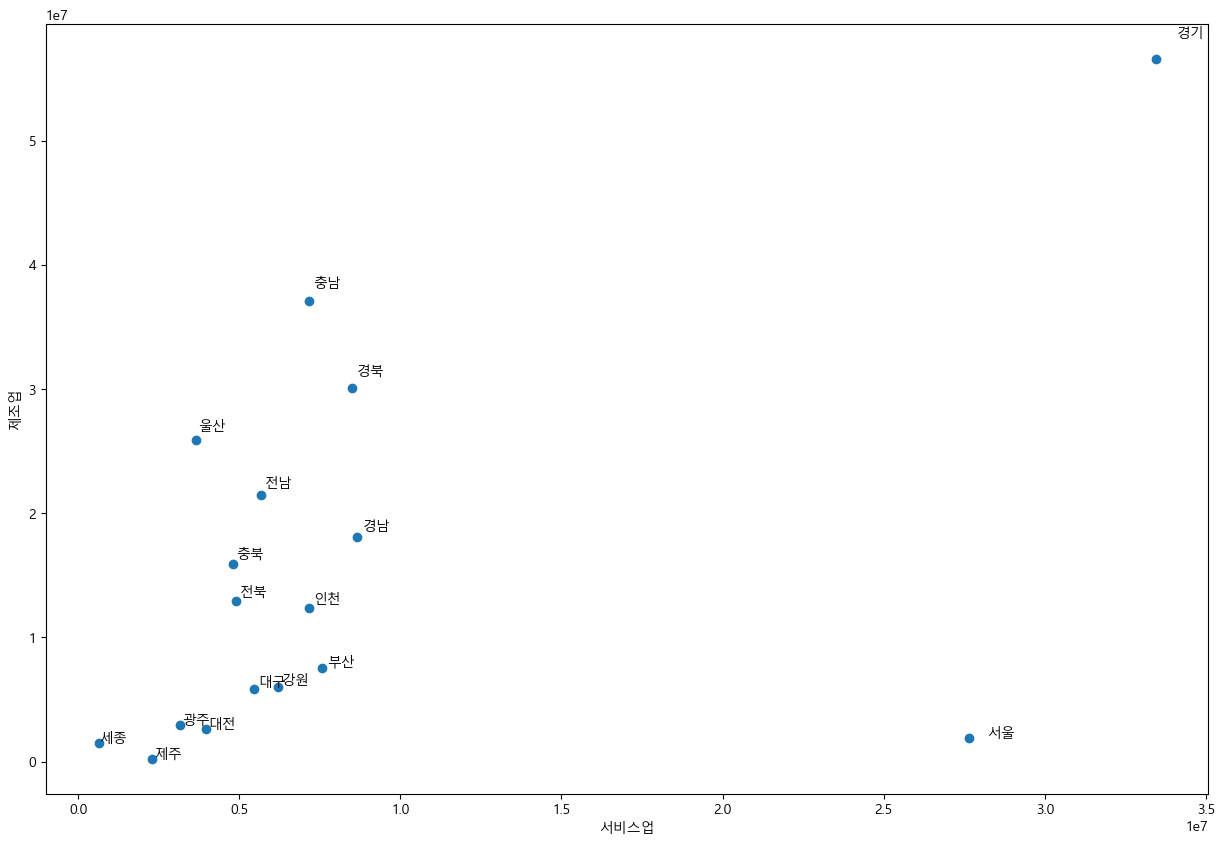

In [24]:
plt.figure(figsize = (15,10))
plt.scatter(power2["서비스업"],power2["제조업"])

plt.xlabel("서비스업")
plt.ylabel("제조업")

for n in range(power2.shape[0]):
    plt.text(power2["서비스업"][n]*1.02, power2["제조업"][n]*1.03, power2.index[n])

In [25]:
power3 = power.drop(["경기","서울"])
power3

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,...,39477,35063,2019,38062,43986,113448,108629,12872,3418,7007712
경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,...,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580
경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,...,933178,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631
광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,6782,...,156396,198847,5967,236622,723764,512148,5140,13392,16049,2988274
대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,16215,...,661307,516493,58446,180189,252662,1381273,68127,41814,33616,5937633
대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,4311,...,69342,77970,2949,83609,474561,218191,5439,31657,2252,2640312
부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,51980,...,872952,904149,4913,107717,90644,1046529,231141,49733,13104,7645804
세종,384903,299675,645424,945099,69469,16364,1502922,110211,70617,1324,...,11390,26185,14319,33539,170366,79009,0,5132,2603,1588755
울산,1487143,489865,3649386,4139251,80221,20103,25883132,187738,943299,12286,...,393469,169132,5053,381602,24165,2367150,1020610,4984,1626,25983456


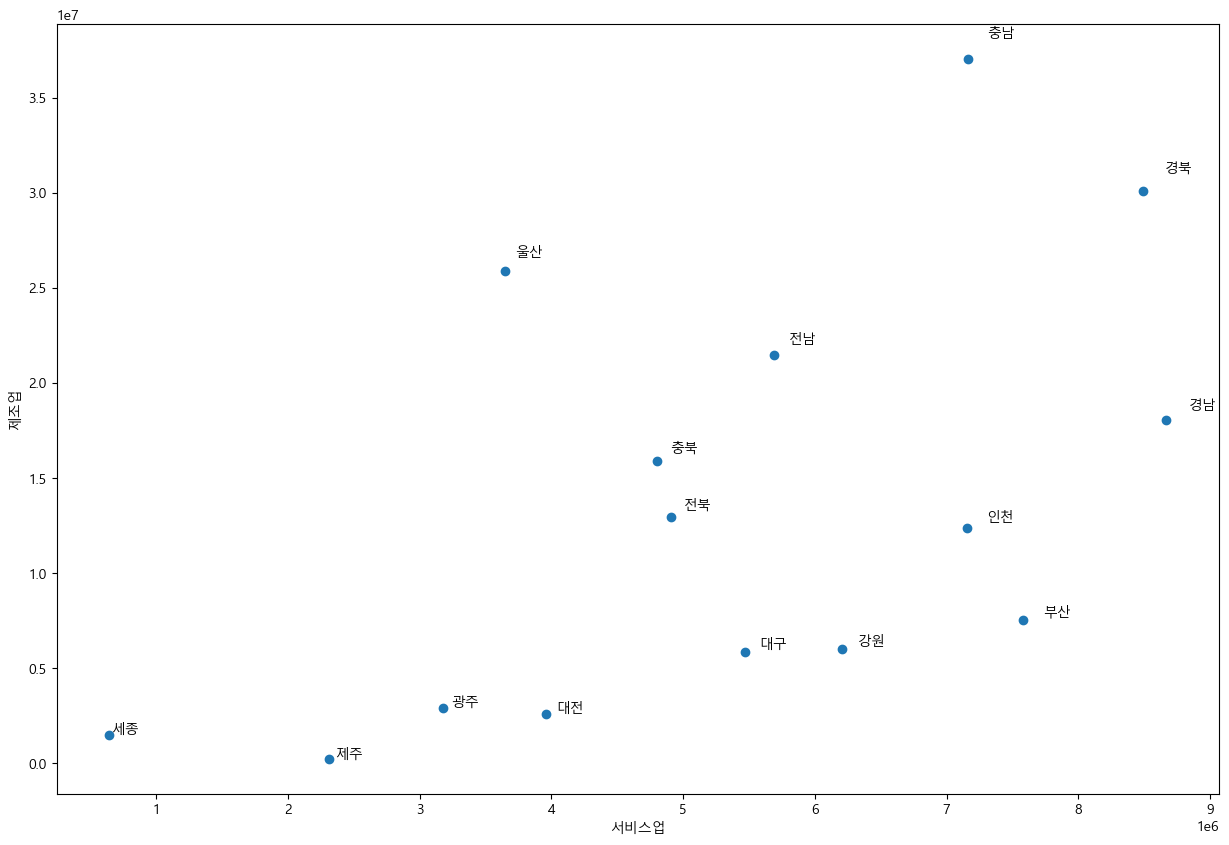

In [26]:
plt.figure(figsize = (15,10))
plt.scatter(power3["서비스업"],power3["제조업"])

plt.xlabel("서비스업")
plt.ylabel("제조업")

for n in range(power3.shape[0]):
    plt.text(power3["서비스업"][n]*1.02, power3["제조업"][n]*1.03, power3.index[n])

Scipy는 기본적으로 numpy, matplotlib, pandas, sympy등과 함께 함께 동작을 합니다.  
Scipy 수치적분 루틴과 미분방정식 해석기, 방정식의 근을 구하는 알고리즘, 표준 연속/이산 확률분포와 다양한 통계관련 도구 등을 제공

In [27]:
!pip install scipy

In [28]:
!pip install seaborn

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import platform
from matplotlib import font_manager, rc 
import matplotlib
# '-' 부호가 제대로 표시되게 하는 설정 
matplotlib.rcParams['axes.unicode_minus'] = False
# 운영 체제마다 한글이 보이게 하는 설정 # 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name() 
    rc('font', family=font_name)
#맥
elif platform.system() == 'Darwin': 
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

## 통계적 분석
### 주택가격 예측 데이터 사용
- 상관관계가 큰 변수 찾기
- 결측처리
- 이상치 처리
- 로그변환

### 아래 캐글 데이터를 다운받아 "data/house_data"폴더에 저장한다. 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [30]:
df_train = pd.read_csv("./data/house_data/train.csv")
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [31]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 특성값 설명 
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property   부지모양
- LandContour: Flatness of the property  평탄도
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling

## OverallQual: Overall material and finish quality 
- OverallCond: Overall condition rating  
## YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area

## TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)

## GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage  
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway  
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet  
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

## 위 변수중에 중요한 역할을 하는것
- OverallQual : 전반적인 소재 및 마감 품질  
- YearBuilt : 오리지널 건축 및 구성 날짜
- TotalBsmtSF : 지하실 면적의 총 평방 피트
- GrLivArea : 지상 거실 면적 평방 피트

In [33]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

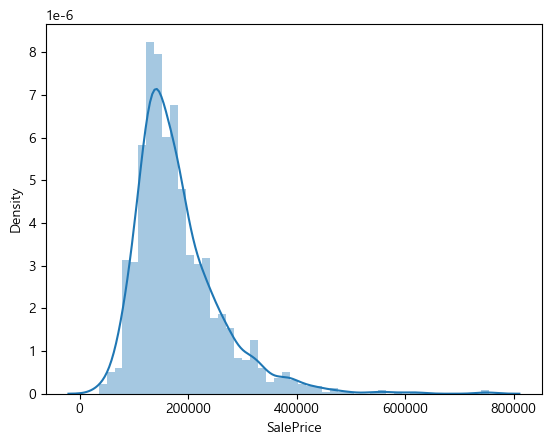

In [34]:
#seaborn 그래프 사용
sns.distplot(df_train["SalePrice"]) # hist 그래프와 kde 그래프를 통합 그래프, 분포와 밀도를 확인, kde:커널밀도 그래프

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

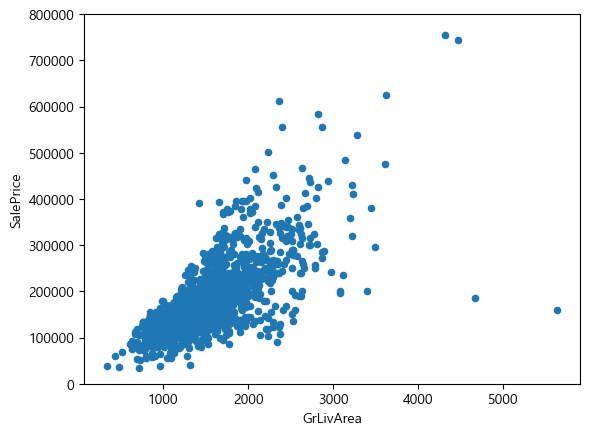

In [36]:
var = "GrLivArea"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis = 1) #데이터 속성 형태가 동일한 데이터끼리 합칠때 
                                                                #axis = 0, 0: 위+아래로 합치기, axis = 1, 1: 왼쪽+오른쪽으로 합치기
data
data.plot.scatter(x = var, y = "SalePrice", ylim = (0, 800000))

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

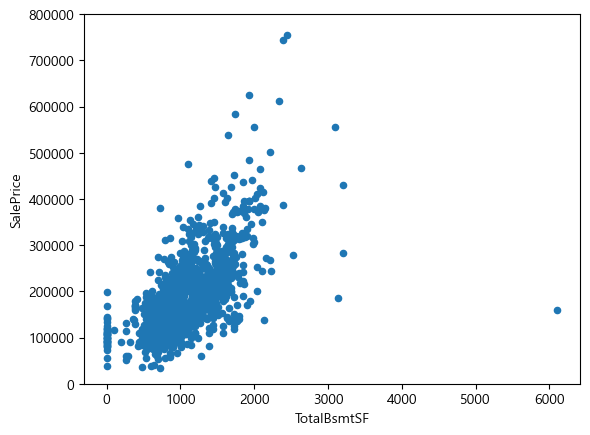

In [37]:
var = "TotalBsmtSF"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis = 1) #데이터 속성 형태가 동일한 데이터끼리 합칠때 
                                                                #axis = 0, 0: 위+아래로 합치기, axis = 1, 1: 왼쪽+오른쪽으로 합치기
data
data.plot.scatter(x = var, y = "SalePrice", ylim = (0, 800000))

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

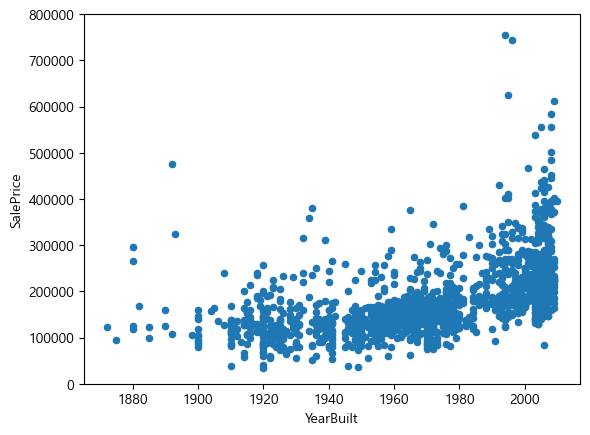

In [38]:
var = "YearBuilt"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis = 1) #데이터 속성 형태가 동일한 데이터끼리 합칠때 
                                                                #axis = 0, 0: 위+아래로 합치기, axis = 1, 1: 왼쪽+오른쪽으로 합치기
data
data.plot.scatter(x = var, y = "SalePrice", ylim = (0, 800000))

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

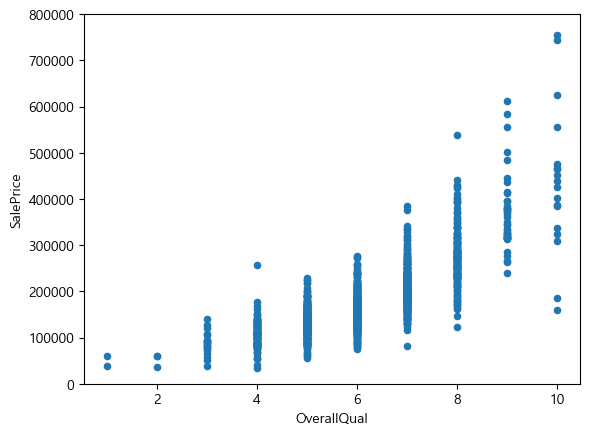

In [39]:
var = "OverallQual"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis = 1) #데이터 속성 형태가 동일한 데이터끼리 합칠때 
                                                                #axis = 0, 0: 위+아래로 합치기, axis = 1, 1: 왼쪽+오른쪽으로 합치기
data
data.plot.scatter(x = var, y = "SalePrice", ylim = (0, 800000))

(-0.5, 9.5, 0.0, 800000.0)

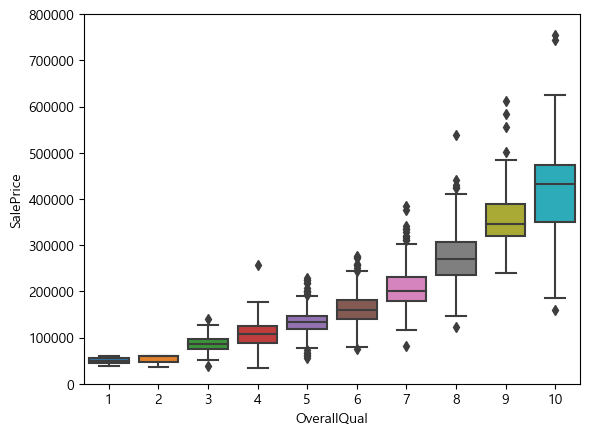

In [41]:
var = "OverallQual"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis = 1) #데이터 속성 형태가 동일한 데이터끼리 합칠때 
                                                                #axis = 0, 0: 위+아래로 합치기, axis = 1, 1: 왼쪽+오른쪽으로 합치기

fig = sns.boxplot(x = var, y = "SalePrice", data = data)
fig.axis(ymin=0,ymax = 800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

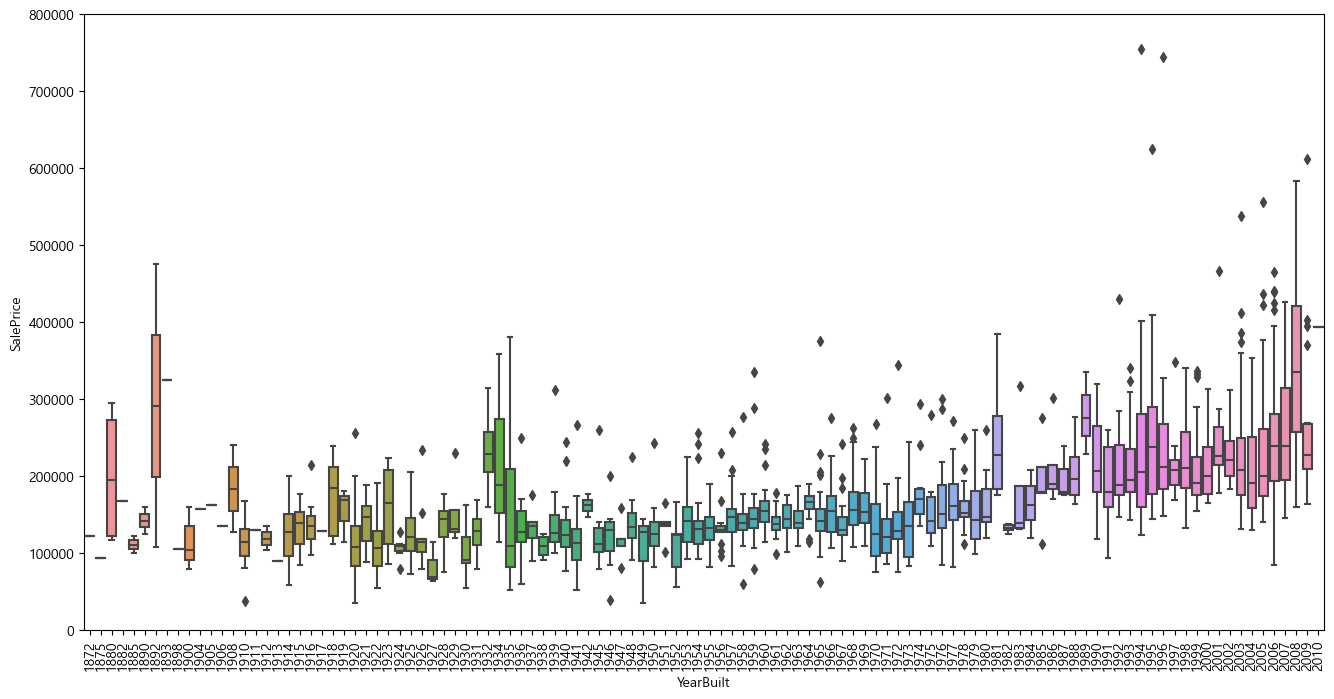

In [46]:
var = "YearBuilt"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis = 1) #데이터 속성 형태가 동일한 데이터끼리 합칠때 
                                                                #axis = 0, 0: 위+아래로 합치기, axis = 1, 1: 왼쪽+오른쪽으로 합치기
f, ax = plt.subplots(figsize = (16,8))
    
fig = sns.boxplot(x = var, y = "SalePrice", data = data)
fig.axis(ymin=0,ymax = 800000)
plt.xticks(rotation = 90)

### Heat Map(히트맵)
열을 뜻하는 히트와 지도를 뜻하는 맵을 결합, 열분포 형태 그래픽 출력

In [47]:
df_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<Axes: >

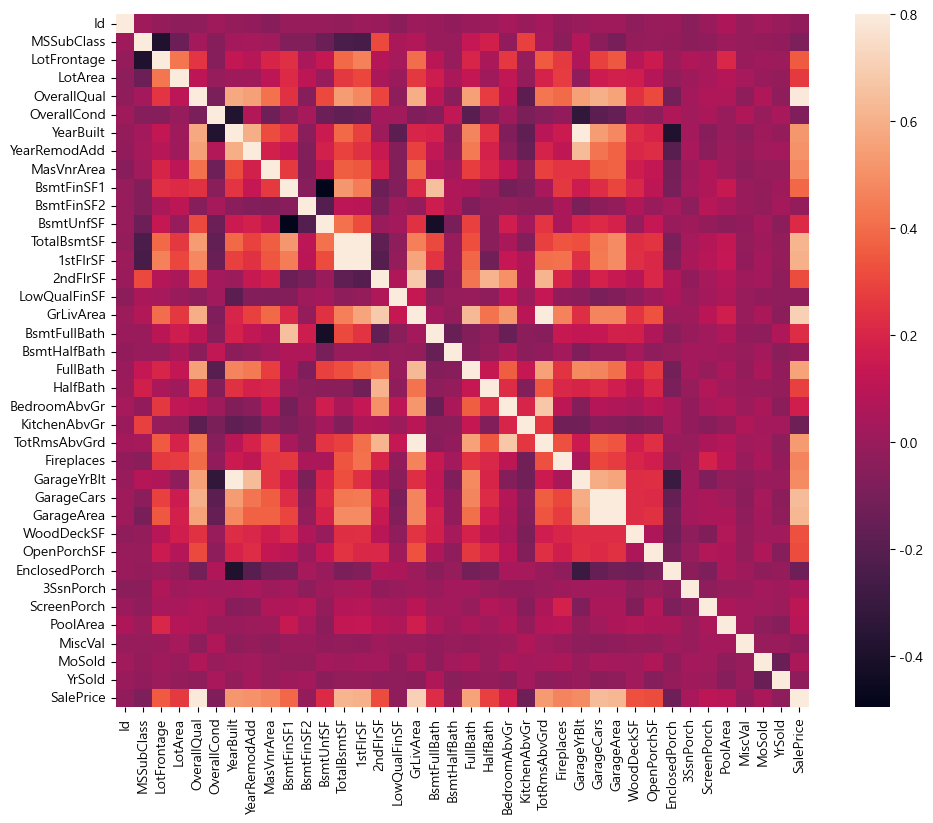

In [50]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax = .8, square = True)

corr 함수를 통해 상관계수 연산(-1, 1사이의 결과) 1에 가까울수록 두 변수가 비슷하게 증가  
-1에 가까울수록 하나는 증가 또 하나는 감소  
0에 가까울수록 두 변수간에 관계가 없다  
위 그래프 "SalePrice"와의 상관관계를 보여준다.  
위 그래프를 보면 OverallQual(전반적인 마감재 품질), TotalBsmtSF(지하실면적). GrLivArea(거실면적)   
이 "SalePrice"와의 관련이 많은 것을 알수 있다. 하지만, 다른 특성들도 일부 관련이 있으므로 무시 할 수 없다.

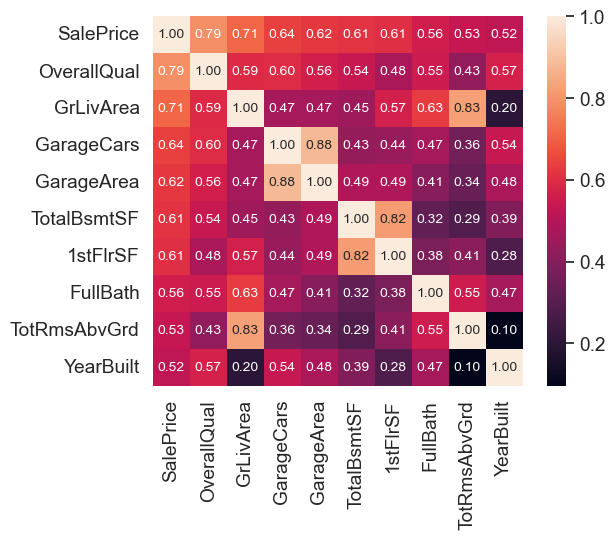

In [63]:
k = 10
corrmat = df_train.corr()
cols = corrmat.nlargest(k, "SalePrice")["SalePrice"].index #상관계수 가장 큰값 k(10)까지 구하기

cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, 
                 square= True, fmt = ".2f", annot_kws = {"size":10}, 
                 yticklabels = cols.values, xticklabels = cols.values)

 - SalePrice와의 OverallQual(전반적인 마감재 품질), TotalBsmtSF(지하실면적). GrLivArea(거실면적)은 상관관계가 크다.  
 - GarageCars, GarageArea특성은 같은 의미를 갖는것으로 보인다(상관관계 0.88)
 - TotalBsmtSF(지하실면적)와 1stFIrst도 상관관계가 크다(0.82)
 - TotRmsAvGrd와 GrLivArea(거실면적)도 상관관계가 크다(0.83)

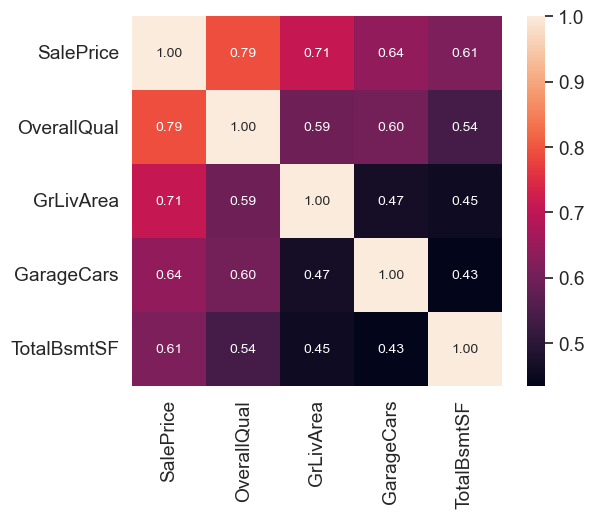

In [59]:
corrmat = df_train.corr()
cols = ["SalePrice","OverallQual", "GrLivArea","GarageCars","TotalBsmtSF"]

cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, 
                 square= True, fmt = ".2f", annot_kws = {"size":10}, 
                 yticklabels = cols, xticklabels = cols)

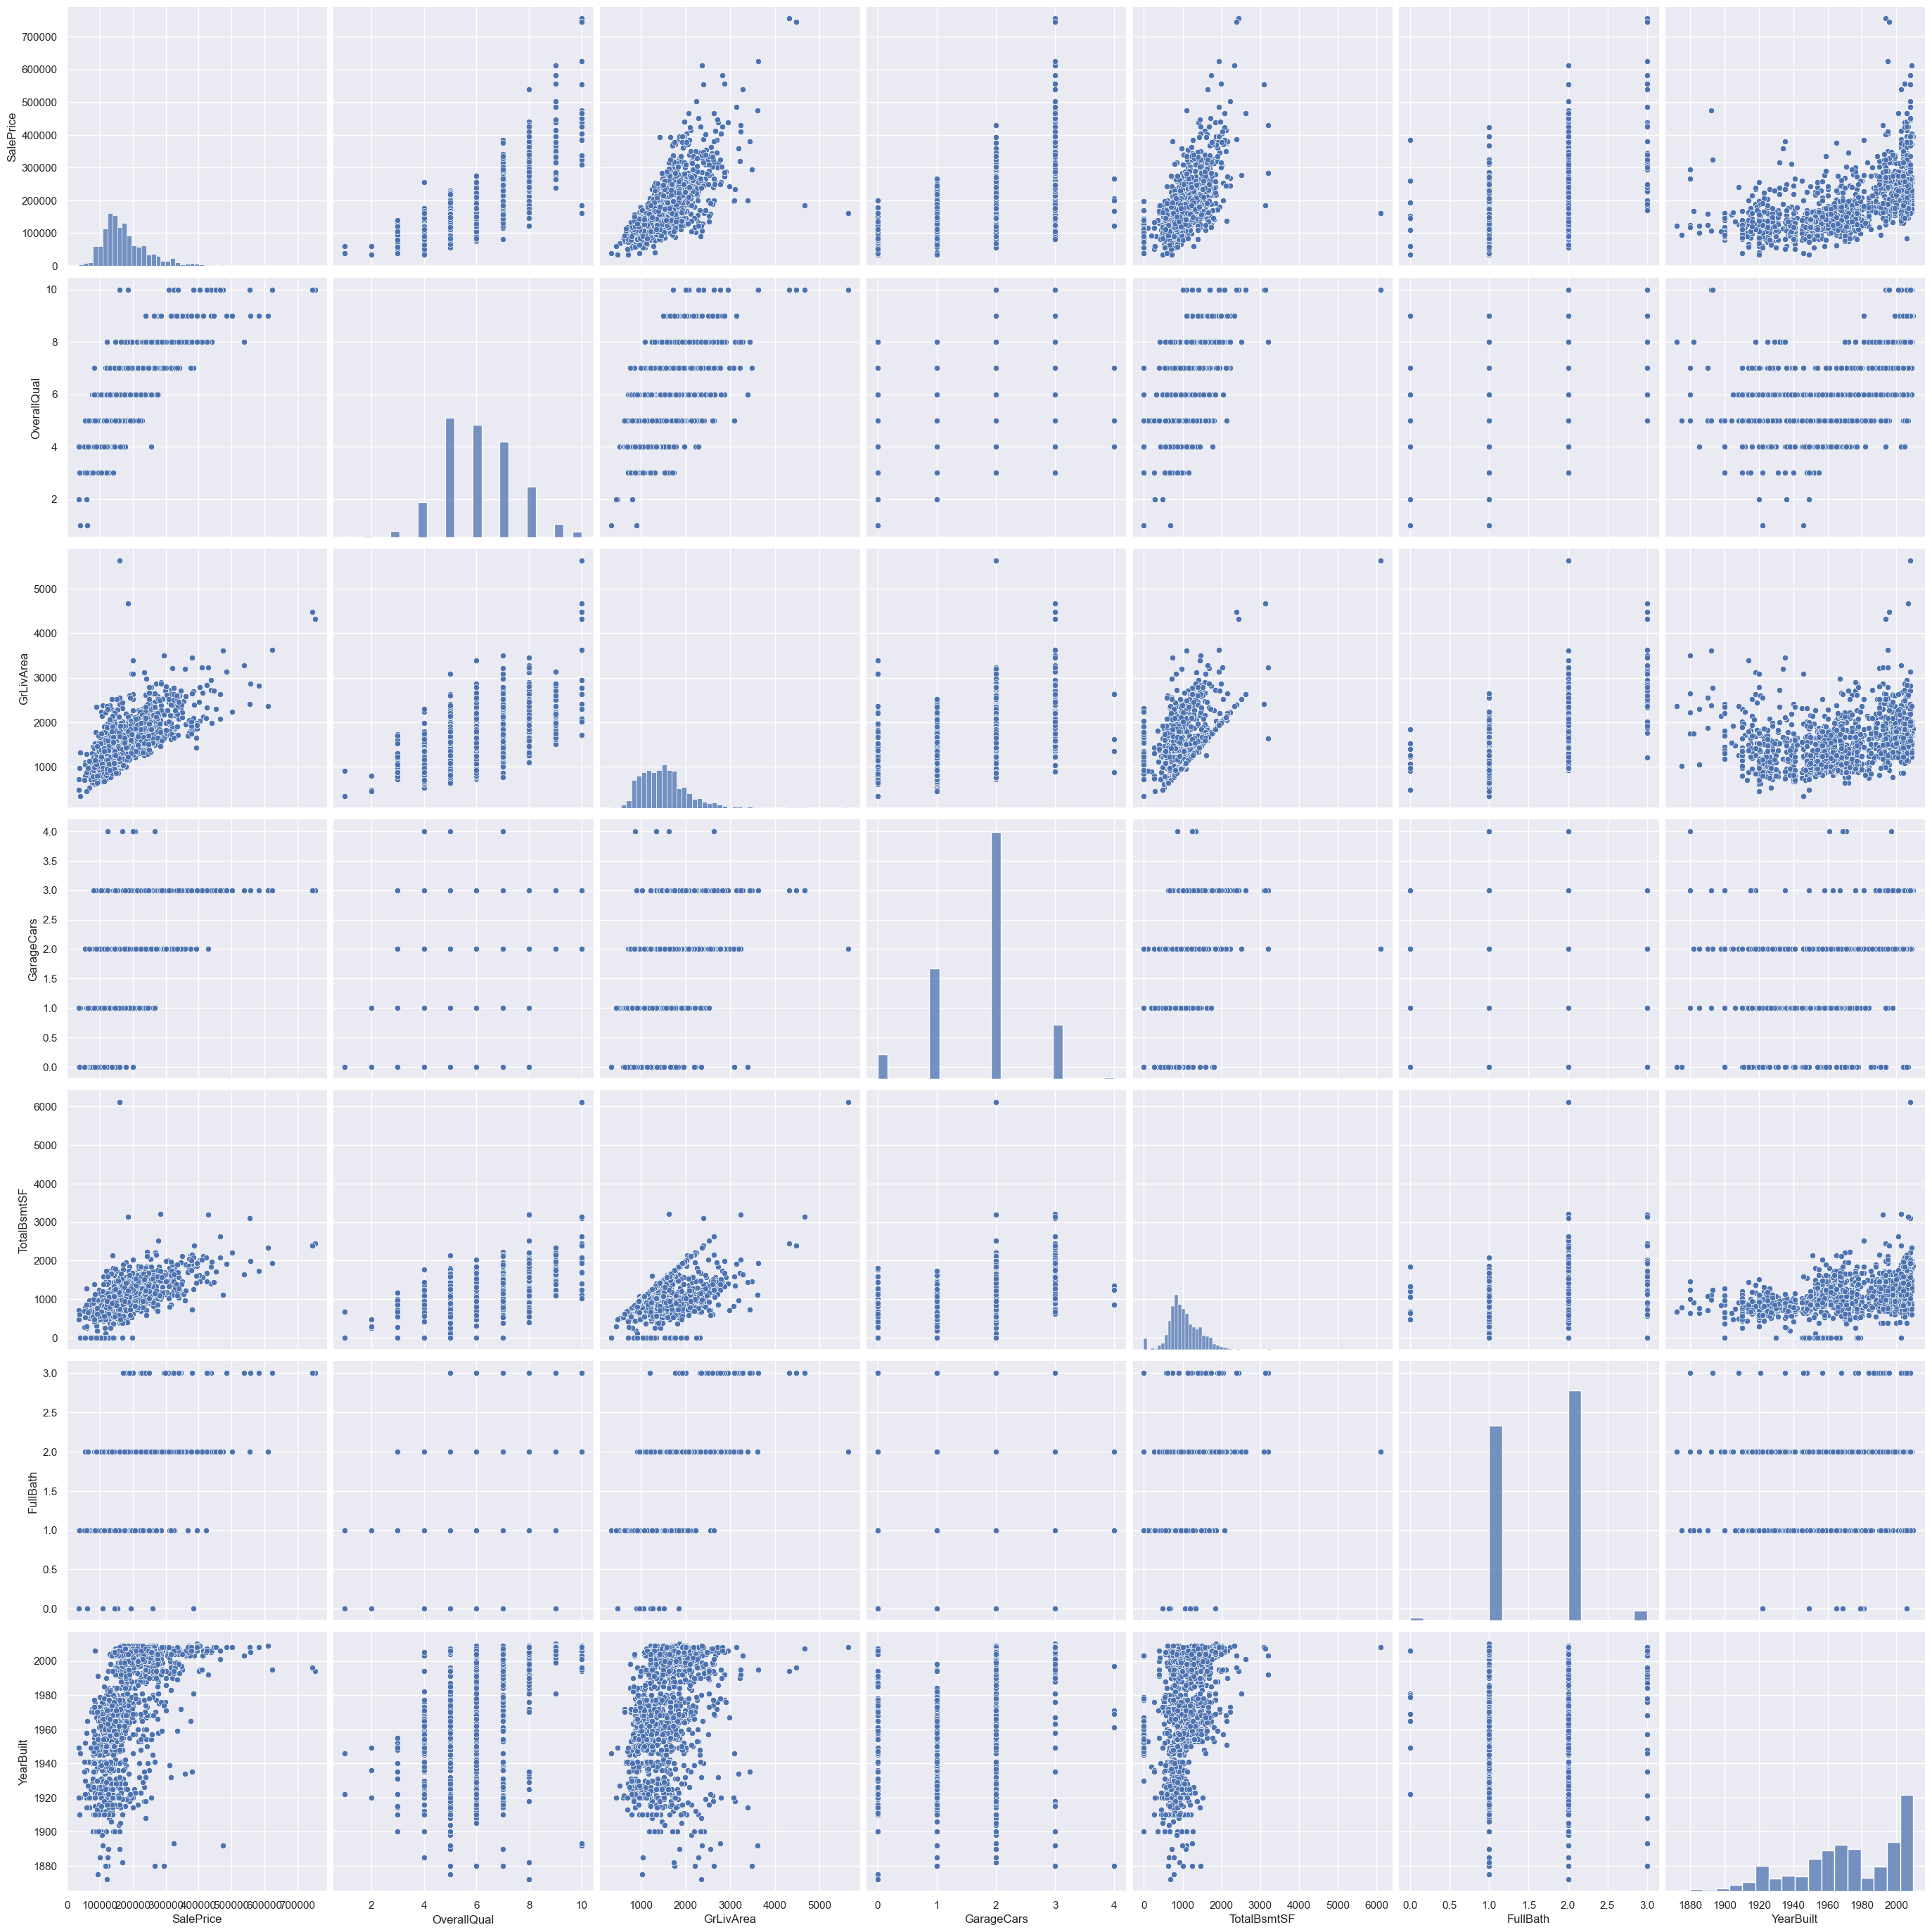

In [61]:
sns.set()
cols = ["SalePrice","OverallQual", "GrLivArea","GarageCars","TotalBsmtSF","FullBath","YearBuilt"]
sns.pairplot(df_train[cols],size = 4)
plt.show()

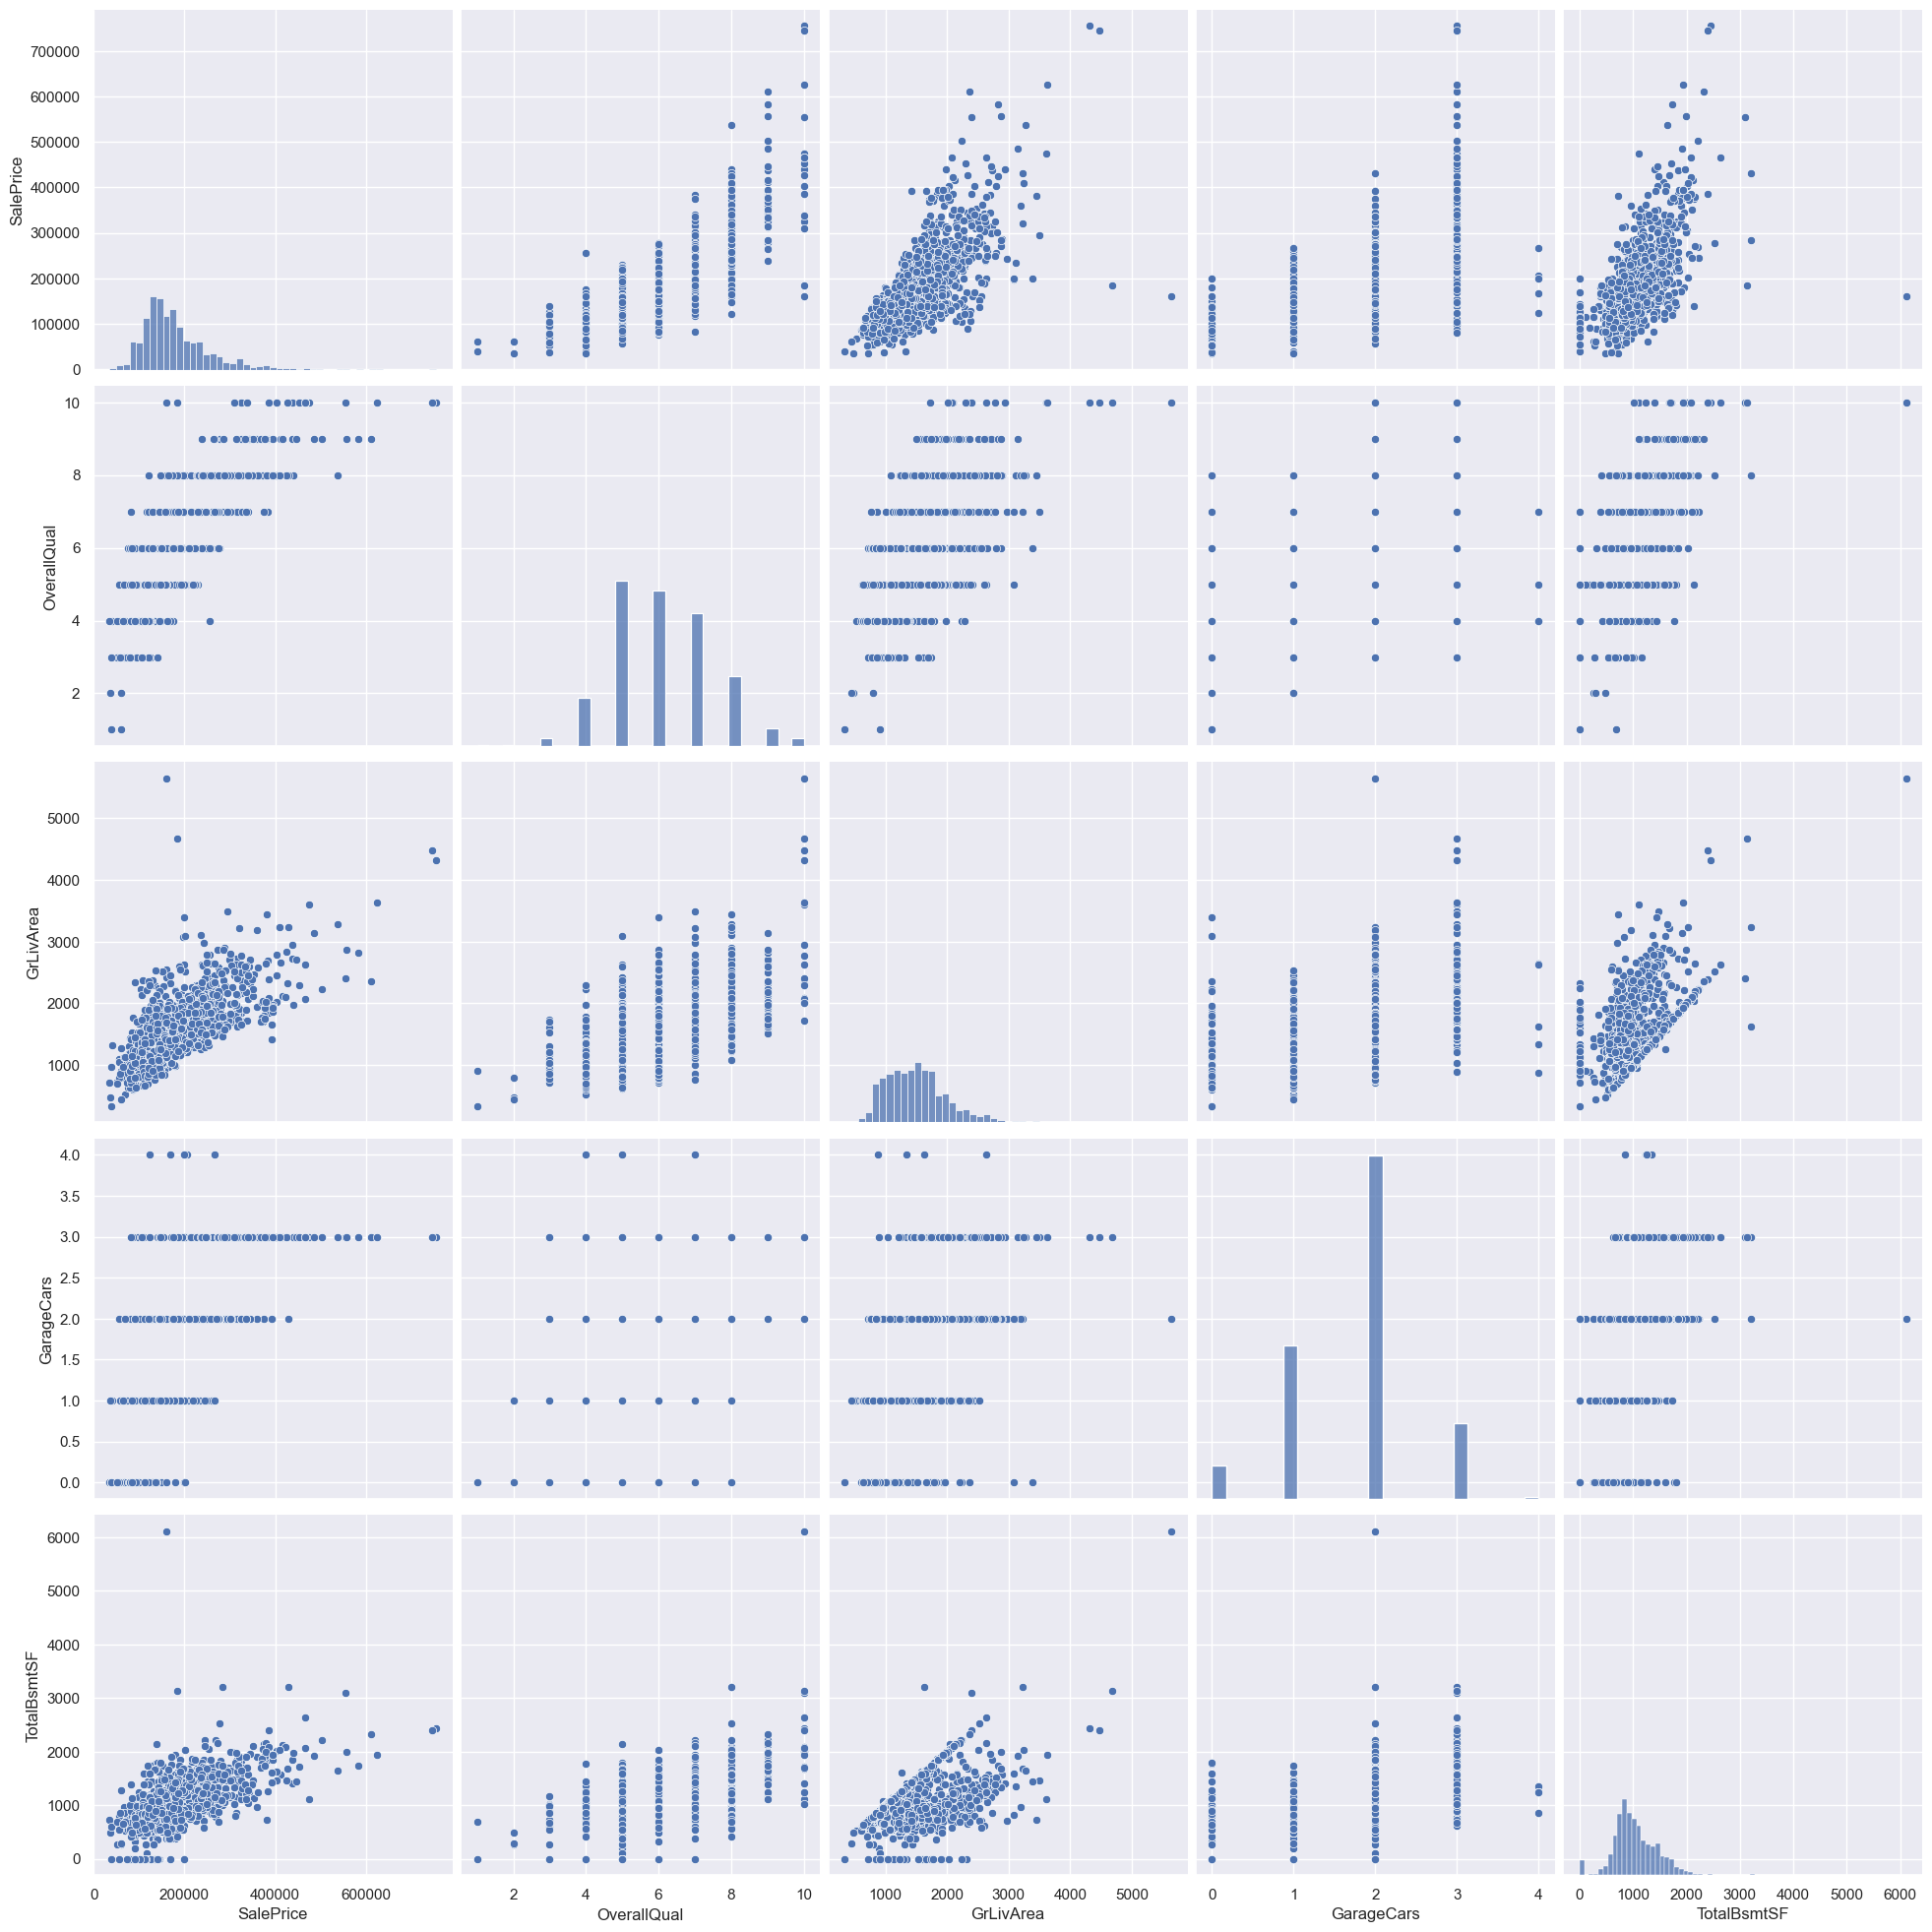

In [62]:
sns.set()
cols = ["SalePrice","OverallQual", "GrLivArea","GarageCars","TotalBsmtSF"]
sns.pairplot(df_train[cols],size = 4)
plt.show()

## 결측치 처리
### 결측치는 누락된 값, 비어 있는 값을 의미, 오타
### 결측치가 있으면 함수가 적용되지 않거나 분석결과가 왜곡
### 결측치가 있는 것을 확인하고 제거 또는 처리과정이 필요

In [64]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [69]:
total = df_train.isnull().sum().sort_values(ascending = False)
total.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [71]:
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)
percent.head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [75]:
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([total, percent],axis = 1, keys = ["total", "percent"])
missing_data.head(20)

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


### 결측율이 15%이상이면 이 특성은 제외하고 분석하는 것이 타당(PoolQC, MiscFeature 등등)
### 데이터의 중요도도 생각해봐야 함
### GarageX, BsmtX의 결측치 비율이 같고 중복성이 있다. 
### MasVnrArea, MasVnrType는 YearBuilt나 OverallQual와 상관관계가 크므로 중복성이 있어 제외 가능
### Electrical는 결측치가 1개이므로 해당 샘플만 제거

In [77]:
df_train1 = df_train.drop((missing_data[missing_data["total"]>1]).index,1)
df_train1 = df_train1.drop(df_train.loc[df_train["Electrical"].isnull()].index)
df_train1.isnull().sum().max()

0

## 특이값
중요한 의미나 정보를 포함할 수 있다. 표준편차나 산포도에서 찾을 수 있다.  
표준 정규화를 하여 비교, 상위 영역 7이상의 표준편차 차이가 있는 것을 알 수 있다.

In [84]:
saleprice_scled = StandardScaler().fit_transform(df_train1["SalePrice"][:, np.newaxis])
low_range = saleprice_scled[saleprice_scled[:,0].argsort()][:10]
high_range = saleprice_scled[saleprice_scled[:,0].argsort()][-10:]
print("outer range (low) or the distribution")
print(low_range)
print("outer range (high) or the distribution")
print(high_range)

outer range (low) or the distribution
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]
outer range (high) or the distribution
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

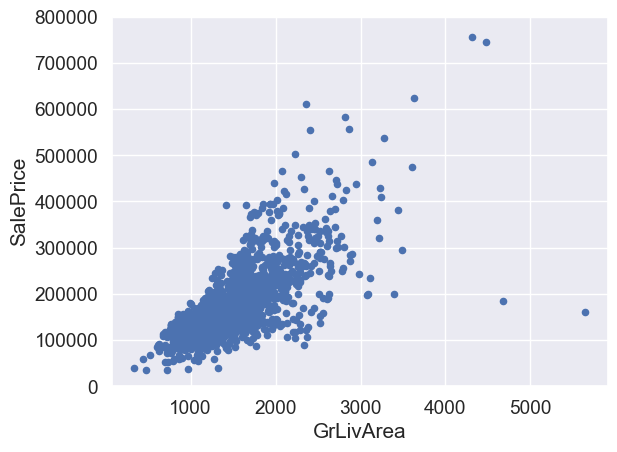

In [88]:
var = "GrLivArea"
data = pd.concat([df_train1["SalePrice"], df_train1[var]], axis = 1) #데이터 속성 형태가 동일한 데이터끼리 합칠때 
                                                                #axis = 0, 0: 위+아래로 합치기, axis = 1, 1: 왼쪽+오른쪽으로 합치기
data
data.plot.scatter(x = var, y = "SalePrice", ylim = (0, 800000))

In [86]:
df_train1["GrLivArea"]

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1459, dtype: int64

In [87]:
df_t = df_train1[df_train1.GrLivArea >= 4000]
df_t

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000


In [89]:
df_t["GrLivArea"]

523     4676
691     4316
1182    4476
1298    5642
Name: GrLivArea, dtype: int64

In [90]:
df_train1.sort_values(by = "GrLivArea", ascending = False)[:2]
df_train1 = df_train1.drop(df_train1[df_train1["Id"] == 1299].index)
df_train1 = df_train1.drop(df_train1[df_train1["Id"] == 524].index)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

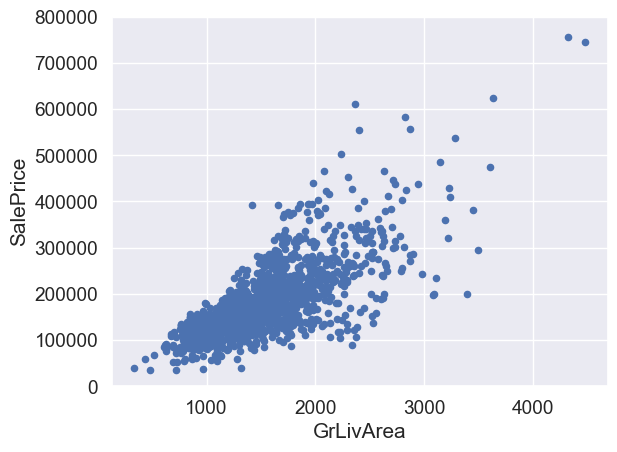

In [91]:
var = "GrLivArea"
data = pd.concat([df_train1["SalePrice"], df_train1[var]], axis = 1) #데이터 속성 형태가 동일한 데이터끼리 합칠때 
                                                                #axis = 0, 0: 위+아래로 합치기, axis = 1, 1: 왼쪽+오른쪽으로 합치기
data
data.plot.scatter(x = var, y = "SalePrice", ylim = (0, 800000))

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

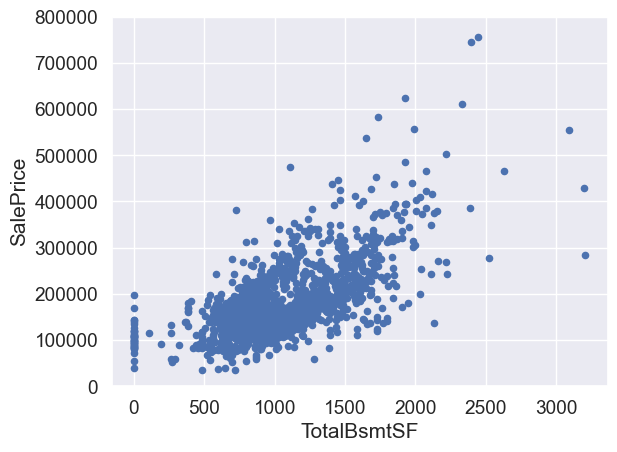

In [93]:
var = "TotalBsmtSF"
data = pd.concat([df_train1["SalePrice"], df_train1[var]], axis = 1) #데이터 속성 형태가 동일한 데이터끼리 합칠때 
                                                                #axis = 0, 0: 위+아래로 합치기, axis = 1, 1: 왼쪽+오른쪽으로 합치기
data
data.plot.scatter(x = var, y = "SalePrice", ylim = (0, 800000))

(-0.5, 9.5, 0.0, 800000.0)

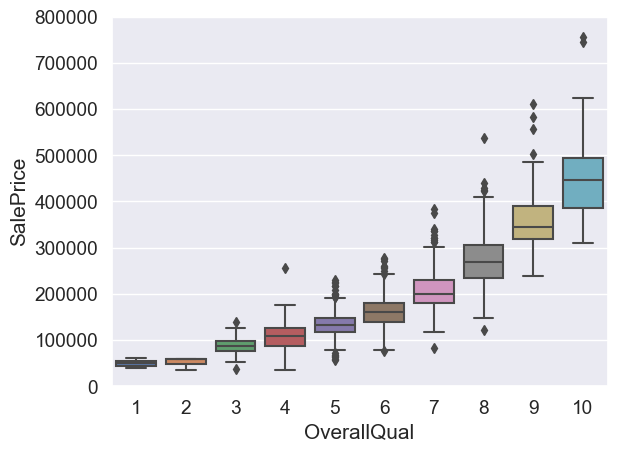

In [95]:
var = "OverallQual"
data = pd.concat([df_train1["SalePrice"], df_train1[var]], axis = 1) #데이터 속성 형태가 동일한 데이터끼리 합칠때 
                                                                #axis = 0, 0: 위+아래로 합치기, axis = 1, 1: 왼쪽+오른쪽으로 합치기

fig = sns.boxplot(x = var, y = "SalePrice", data = data)
fig.axis(ymin=0,ymax = 800000)

### 다음단계
점검할 사항
- 정규성
- 등분산성
- 선형관계성
- 히스토그램:첨도 및 왜도 점검

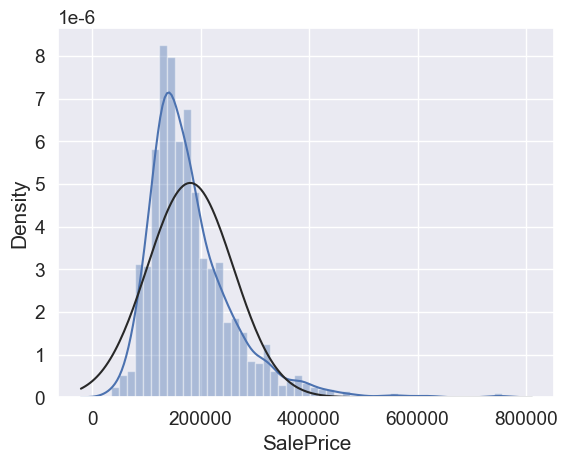

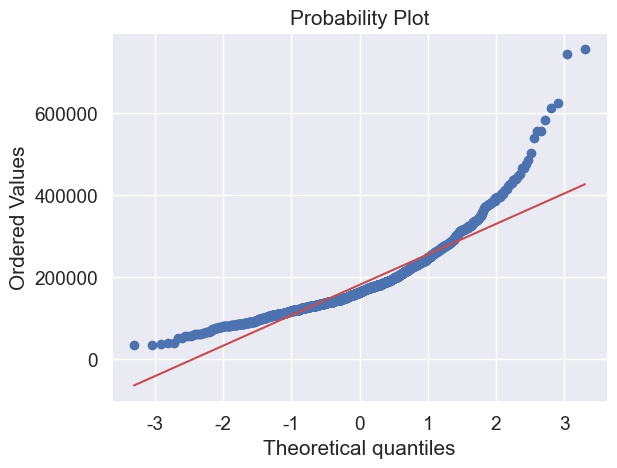

In [98]:
sns.distplot(df_train["SalePrice"], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train1["SalePrice"],plot = plt)

### SalePrice는 정규분포는 아니다. 정점이 존재하고 양의 왜곡을 보인다.
정규분포에서 벗어남  
양의 왜곡현상 : 중앙값 > 평균 오른쪽을 늘어진 경우 

In [101]:
print("Skewness : %f" % df_train1["SalePrice"].skew())

Skewness : 1.880363


### 왜도 : 분포의 좌우 비대칭성(정규분포에 비해 얼마나 비대칭인지)
왜도 값이 -2-2 정도의 치우침은 왜도가 크지 않다고 판단, 절대값 3미만이면 기준에 부합

## 데이터 전처리
- 수집한 데이터를 분석하기 좋게 변환하는 모든 작업으로 데이터정제(Data cleaning)라고도 함

### 결측치 처리
1. 결측치가 포함된 항목을 모두 버리는 방법  
    (버리는 항목의 비중이 크면 무시하기 어려움)
    - dataframe.dropna()
2. 결측치를 적절한 값으로 대체  
    (평균값, 인접값으로 추정, 0, 최소값, 특정상수 등)
    - dataframe.fillna(0)
    - dataframe.fillna(data.mean())
3. 분석단계로 결측치 처리를 넘김(NA로 표기)

In [104]:
df = pd.DataFrame(np.random.randn(3,4))
df

,0,1,2,3
0,-0.663482,1.275333,1.409127,0.043576
1,-2.085847,0.399600,-0.037885,-0.163093
2,-0.145389,2.094112,1.685554,0.950120


In [105]:
df[1][2] = np.nan
df

,0,1,2,3
0,-0.663482,1.275333,1.409127,0.043576
1,-2.085847,0.399600,-0.037885,-0.163093
2,-0.145389,NaN,1.685554,0.950120


In [106]:
cleaned = df.dropna()
cleaned

,0,1,2,3
0,-0.663482,1.275333,1.409127,0.043576
1,-2.085847,0.399600,-0.037885,-0.163093


In [107]:
df_2 = df.fillna(0)
df_2

,0,1,2,3
0,-0.663482,1.275333,1.409127,0.043576
1,-2.085847,0.399600,-0.037885,-0.163093
2,-0.145389,0.000000,1.685554,0.950120


In [108]:
print(df.mean(axis = 0))

0   -0.964906
1    0.837467
2    1.018932
3    0.276868
dtype: float64


In [109]:
df_3 = df.fillna(df.mean(axis = 0))
df_3

,0,1,2,3
0,-0.663482,1.275333,1.409127,0.043576
1,-2.085847,0.399600,-0.037885,-0.163093
2,-0.145389,0.837467,1.685554,0.950120


In [110]:
df_4 = df.fillna(method = "ffill") # ffill: 바로 앞에(forard) 값으로 대체
df_4

,0,1,2,3
0,-0.663482,1.275333,1.409127,0.043576
1,-2.085847,0.399600,-0.037885,-0.163093
2,-0.145389,0.399600,1.685554,0.950120


## 데이터변환
- 데이터를 주어진 그대로 사용 X, 다른 형태로 변환하여 사용하는 것이 필요한 경우가 많다
- 범주형, 로그변환, 역수변환
- 범주형 데이터 변환
  나이 => 10대, 20대, 30대, 40대
  내신등급 분포(등급 차이에 대한 느낌이 같도록 정한다.)
- 로그 변환  
  원래 값에 로그를 취한 값을 사용, 사람이 느끼는 감각의 경우(소리, 빛, 압력, 냄새 등등)
- 역수 변환   
  역수를 사용하면 선형적인 특성, 자동차의 마일리지는 연료 1리터로 몇 km가는지? 1리터로 10키로, 1키로는 1/10리터

In [116]:
n_samples = 10
height = 3*np.random.randn(n_samples).round() + 170
nationality = np.random.randint(0, 3, n_samples)

In [117]:
height

array([173., 173., 167., 179., 170., 167., 170., 173., 167., 170.])

In [118]:
nationality

array([0, 0, 2, 0, 0, 1, 2, 2, 0, 2])

In [119]:
df = pd.DataFrame(list(zip(height,nationality)), columns = ["height", "nationality"])
df

,height,nationality
0,173.0,0
1,173.0,0
2,167.0,2
3,179.0,0
4,170.0,0
5,167.0,1
6,170.0,2
7,173.0,2
8,167.0,0
9,170.0,2


머신러닝을 할때 기계가 이해할 수 있도록 모든 데이터를 수치로 변환해주는 전처리 작업 필수적, 먼저 수치형 데이터로 변환을 해주고(0, 1, 2,3..)  
그다음 수치화된 데이터를 가변수화하여 나타내 준다면 기계학습에 적합한 데이터의 형태로 가공  
수치형 데이터로만 변환을 하게 되면 서로간의 관계성이 생긴다. 예를 들어 월요일 1, 화요일 2, 수요일 3이라고  
단순하게 수치형 데이터로 변환하게 되면 해당 데이터들 간의 1+2 =3이라는 관계성이 존재  
그러나 실제 데이터인 월요일, 화요일, 수요일 간에는 그러한 관계성이 없다.  
**따라서 사실이 아닌 관계성으로 인해 잘못된 학습이 일어날 수 있으므로 서로 무관한 수,  
즉, 더미로 만든 가변수로 변환함으로서 그러한 문제를 막아준다.**  

### 원핫인코딩(one hot encoding): 하나로 하나의 특성(컬럼)만 1일 될 수 있고 다른 특성(컬럼)은 모두 0으로 코딩하는 방법 
판다스에서는 손쉽게 더미의 가별수를 만들수 있도록 get_dummies함수를 제공  

### 원핫인코딩(one hot encoding) => get_dummies()를 사용

In [120]:
nat = pd.get_dummies(df["nationality"], prefix = "nat_")
nat

,nat__0,nat__1,nat__2
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
5,0,1,0
6,0,0,1
7,0,0,1
8,1,0,0
9,0,0,1


In [121]:
new_df = pd.concat([df, nat], axis = 1)
new_df

,height,nationality,nat__0,nat__1,nat__2
0,173.0,0,1,0,0
1,173.0,0,1,0,0
2,167.0,2,0,0,1
3,179.0,0,1,0,0
4,170.0,0,1,0,0
5,167.0,1,0,1,0
6,170.0,2,0,0,1
7,173.0,2,0,0,1
8,167.0,0,1,0,0
9,170.0,2,0,0,1


In [122]:
new_df.drop("nationality", axis = 1, inplace = True)
new_df

,height,nat__0,nat__1,nat__2
0,173.0,1,0,0
1,173.0,1,0,0
2,167.0,0,0,1
3,179.0,1,0,0
4,170.0,1,0,0
5,167.0,0,1,0
6,170.0,0,0,1
7,173.0,0,0,1
8,167.0,1,0,0
9,170.0,0,0,1
